In [1]:
# This script visualizes the partial dependence plot in the quantile space

In [2]:
# import packages
import os, sys
sys.path.append('../../../lib/')
import WDL as wp
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# load data
X = pd.read_csv('../../../data/simulation/setting_1/dat_X.csv').to_numpy()
res_Frechet = pd.read_csv('output/res_Frechet_qt.csv', index_col=0).to_numpy()
res_Frechet = np.reshape(res_Frechet, (3, 21, 5))
res_CLR = pd.read_csv('output/res_CLR_qt.csv', index_col=0).to_numpy()
res_CLR = np.reshape(res_CLR, (3, 21, 5))
## for WDL
file_list = [file_name for file_name in os.listdir('output/bootstrap_WDL/') if file_name.startswith('qt')]
res_array = []
for file_name in file_list:
    res_mat = np.load('output/bootstrap_WDL/' + file_name)
    res_array.append(res_mat)
res_array = np.array(res_array)
mean_WDL = np.mean(res_array, axis=0)

In [4]:
# simulate the data
n_evals = 20
n_dist = X.shape[0]
p_levs = [0.1, 0.3, 0.5, 0.7, 0.9]
q_evals = np.arange(n_evals+1) / n_evals
res_model = np.zeros((3, 21, 5))
q_X = [np.quantile(X[:, i], q_evals) for i in range(3)]
time_start = datetime.now()
print('Start:', time_start)
for i in range(3):
    for j in range(21):
        X_c = X.copy()
        X_c[:, i] = np.quantile(X[:, i], q_evals[j])
        mu_true = np.zeros((n_dist, 2))
        sig_true = np.zeros((n_dist, 2))
        pi_true = np.zeros((n_dist, 2))
        mu_true[:, 0] = X_c[:, 0]
        mu_true[:, 1] = 2 * X_c[:, 1]**2 + 2
        sig_true[:, 0] = np.abs(X_c[:, 1]) + 0.5
        sig_true[:, 1] = np.abs(X_c[:, 0]) + 0.5
        pi_true[:, 0] = 1 / (1 + np.exp(X_c[:, 2]))
        pi_true[:, 1] = 1 - pi_true[:, 0]
        res_model[i, j] = np.mean([wp.qgmm1d(p_levs, mu_true[l], sig_true[l], pi_true[l]) for l in range(n_dist)], axis=0)
print('Time:', datetime.now() - time_start)

Start: 2021-09-13 20:29:59.722057
Time: 0:00:05.710428


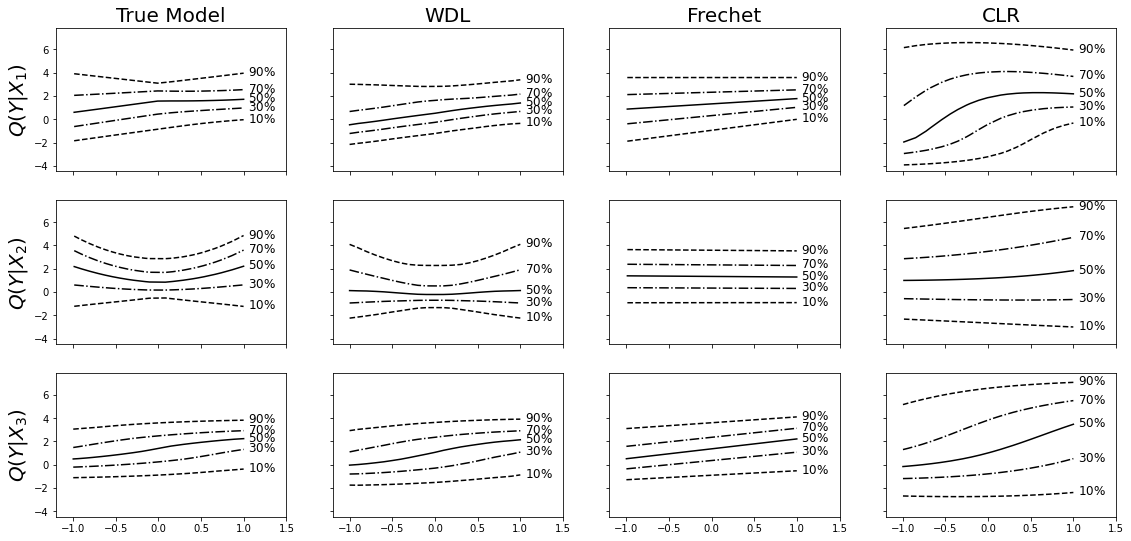

In [6]:
## Ver 1. visualize the partial dependence plot
fig, ax = plt.subplots(3, 4, figsize=(19, 9), sharex=True, sharey=True)
x_eval = np.linspace(-1, 1, 21)
id_var = 0
# plot the partial dependence plot
ax[0, 0].plot(q_X[id_var], res_model[id_var, :, 0], c = 'black', linestyle= '--')
ax[0, 0].plot(q_X[id_var], res_model[id_var, :, 1], c = 'black', linestyle= '-.')
ax[0, 0].plot(q_X[id_var], res_model[id_var, :, 2], c = 'black', linestyle= '-')
ax[0, 0].plot(q_X[id_var], res_model[id_var, :, 3], c = 'black', linestyle= '-.')
ax[0, 0].plot(q_X[id_var], res_model[id_var, :, 4], c = 'black', linestyle= '--')
#ax[0, 0].legend()
ax[0, 0].set_title(r'True Model', fontsize=20)
ax[0, 0].set_ylabel(r'$Q(Y|X_1)$', fontsize=20)
ax[0, 0].set_xlim([-1.2, 1.5])
ax[0, 0].text(1.05, res_model[id_var, -1, 0]-0.2, r'$10\%$', fontsize=12)
ax[0, 0].text(1.05, res_model[id_var, -1, 1]-0.2, r'$30\%$', fontsize=12)
ax[0, 0].text(1.05, res_model[id_var, -1, 2]-0.2, r'$50\%$', fontsize=12)
ax[0, 0].text(1.05, res_model[id_var, -1, 3]-0.2, r'$70\%$', fontsize=12)
ax[0, 0].text(1.05, res_model[id_var, -1, 4]-0.2, r'$90\%$', fontsize=12)

ax[0, 1].plot(x_eval, mean_WDL[id_var, :, 0], c = 'black', linestyle= '--')
ax[0, 1].plot(x_eval, mean_WDL[id_var, :, 1], c = 'black', linestyle= '-.')
ax[0, 1].plot(x_eval, mean_WDL[id_var, :, 2], c = 'black', linestyle= '-')
ax[0, 1].plot(x_eval, mean_WDL[id_var, :, 3], c = 'black', linestyle= '-.')
ax[0, 1].plot(x_eval, mean_WDL[id_var, :, 4], c = 'black', linestyle= '--')
ax[0, 1].text(1.05, mean_WDL[id_var, -1, 0]-0.2, r'$10\%$', fontsize=12)
ax[0, 1].text(1.05, mean_WDL[id_var, -1, 1]-0.2, r'$30\%$', fontsize=12)
ax[0, 1].text(1.05, mean_WDL[id_var, -1, 2]-0.2, r'$50\%$', fontsize=12)
ax[0, 1].text(1.05, mean_WDL[id_var, -1, 3]-0.2, r'$70\%$', fontsize=12)
ax[0, 1].text(1.05, mean_WDL[id_var, -1, 4]-0.2, r'$90\%$', fontsize=12)
ax[0, 1].set_title(r'WDL', fontsize=20)


ax[0, 2].plot(q_X[id_var], res_Frechet[id_var, :, 0], c = 'black', linestyle= '--')
ax[0, 2].plot(q_X[id_var], res_Frechet[id_var, :, 1], c = 'black', linestyle= '-.')
ax[0, 2].plot(q_X[id_var], res_Frechet[id_var, :, 2], c = 'black', linestyle= '-')
ax[0, 2].plot(q_X[id_var], res_Frechet[id_var, :, 3], c = 'black', linestyle= '-.')
ax[0, 2].plot(q_X[id_var], res_Frechet[id_var, :, 4], c = 'black', linestyle= '--')
ax[0, 2].text(1.05, res_Frechet[id_var, -1, 0]-0.2, r'$10\%$', fontsize=12)
ax[0, 2].text(1.05, res_Frechet[id_var, -1, 1]-0.2, r'$30\%$', fontsize=12)
ax[0, 2].text(1.05, res_Frechet[id_var, -1, 2]-0.2, r'$50\%$', fontsize=12)
ax[0, 2].text(1.05, res_Frechet[id_var, -1, 3]-0.2, r'$70\%$', fontsize=12)
ax[0, 2].text(1.05, res_Frechet[id_var, -1, 4]-0.2, r'$90\%$', fontsize=12)
ax[0, 2].set_title(r'Frechet', fontsize=20)

ax[0, 3].plot(q_X[id_var], res_CLR[id_var, :, 0], c = 'black', linestyle= '--')
ax[0, 3].plot(q_X[id_var], res_CLR[id_var, :, 1], c = 'black', linestyle= '-.')
ax[0, 3].plot(q_X[id_var], res_CLR[id_var, :, 2], c = 'black', linestyle= '-')
ax[0, 3].plot(q_X[id_var], res_CLR[id_var, :, 3], c = 'black', linestyle= '-.')
ax[0, 3].plot(q_X[id_var], res_CLR[id_var, :, 4], c = 'black', linestyle= '--')
ax[0, 3].text(1.05, res_CLR[id_var, -1, 0]-0.2, r'$10\%$', fontsize=12)
ax[0, 3].text(1.05, res_CLR[id_var, -1, 1]-0.2, r'$30\%$', fontsize=12)
ax[0, 3].text(1.05, res_CLR[id_var, -1, 2]-0.2, r'$50\%$', fontsize=12)
ax[0, 3].text(1.05, res_CLR[id_var, -1, 3]-0.2, r'$70\%$', fontsize=12)
ax[0, 3].text(1.05, res_CLR[id_var, -1, 4]-0.2, r'$90\%$', fontsize=12)
ax[0, 3].set_title(r'CLR', fontsize=20)

id_var = 1
# plot the partial dependence plot
ax[1, 0].plot(q_X[id_var], res_model[id_var, :, 0], c = 'black', linestyle= '--')
ax[1, 0].plot(q_X[id_var], res_model[id_var, :, 1], c = 'black', linestyle= '-.')
ax[1, 0].plot(q_X[id_var], res_model[id_var, :, 2], c = 'black', linestyle= '-')
ax[1, 0].plot(q_X[id_var], res_model[id_var, :, 3], c = 'black', linestyle= '-.')
ax[1, 0].plot(q_X[id_var], res_model[id_var, :, 4], c = 'black', linestyle= '--')
#ax[0, 0].legend()
ax[1, 0].set_ylabel(r'$Q(Y|X_2)$', fontsize=20)
ax[1, 0].set_xlim([-1.2, 1.5])
ax[1, 0].text(1.05, res_model[id_var, -1, 0]-0.2, r'$10\%$', fontsize=12)
ax[1, 0].text(1.05, res_model[id_var, -1, 1]-0.2, r'$30\%$', fontsize=12)
ax[1, 0].text(1.05, res_model[id_var, -1, 2]-0.2, r'$50\%$', fontsize=12)
ax[1, 0].text(1.05, res_model[id_var, -1, 3]-0.2, r'$70\%$', fontsize=12)
ax[1, 0].text(1.05, res_model[id_var, -1, 4]-0.2, r'$90\%$', fontsize=12)

ax[1, 1].plot(x_eval, mean_WDL[id_var, :, 0], c = 'black', linestyle= '--')
ax[1, 1].plot(x_eval, mean_WDL[id_var, :, 1], c = 'black', linestyle= '-.')
ax[1, 1].plot(x_eval, mean_WDL[id_var, :, 2], c = 'black', linestyle= '-')
ax[1, 1].plot(x_eval, mean_WDL[id_var, :, 3], c = 'black', linestyle= '-.')
ax[1, 1].plot(x_eval, mean_WDL[id_var, :, 4], c = 'black', linestyle= '--')
ax[1, 1].text(1.05, mean_WDL[id_var, -1, 0]-0.2, r'$10\%$', fontsize=12)
ax[1, 1].text(1.05, mean_WDL[id_var, -1, 1]-0.2, r'$30\%$', fontsize=12)
ax[1, 1].text(1.05, mean_WDL[id_var, -1, 2]-0.2, r'$50\%$', fontsize=12)
ax[1, 1].text(1.05, mean_WDL[id_var, -1, 3]-0.2, r'$70\%$', fontsize=12)
ax[1, 1].text(1.05, mean_WDL[id_var, -1, 4]-0.2, r'$90\%$', fontsize=12)


ax[1, 2].plot(q_X[id_var], res_Frechet[id_var, :, 0], c = 'black', linestyle= '--')
ax[1, 2].plot(q_X[id_var], res_Frechet[id_var, :, 1], c = 'black', linestyle= '-.')
ax[1, 2].plot(q_X[id_var], res_Frechet[id_var, :, 2], c = 'black', linestyle= '-')
ax[1, 2].plot(q_X[id_var], res_Frechet[id_var, :, 3], c = 'black', linestyle= '-.')
ax[1, 2].plot(q_X[id_var], res_Frechet[id_var, :, 4], c = 'black', linestyle= '--')
ax[1, 2].text(1.05, res_Frechet[id_var, -1, 0]-0.2, r'$10\%$', fontsize=12)
ax[1, 2].text(1.05, res_Frechet[id_var, -1, 1]-0.2, r'$30\%$', fontsize=12)
ax[1, 2].text(1.05, res_Frechet[id_var, -1, 2]-0.2, r'$50\%$', fontsize=12)
ax[1, 2].text(1.05, res_Frechet[id_var, -1, 3]-0.2, r'$70\%$', fontsize=12)
ax[1, 2].text(1.05, res_Frechet[id_var, -1, 4]-0.2, r'$90\%$', fontsize=12)

ax[1, 3].plot(q_X[id_var], res_CLR[id_var, :, 0], c = 'black', linestyle= '--')
ax[1, 3].plot(q_X[id_var], res_CLR[id_var, :, 1], c = 'black', linestyle= '-.')
ax[1, 3].plot(q_X[id_var], res_CLR[id_var, :, 2], c = 'black', linestyle= '-')
ax[1, 3].plot(q_X[id_var], res_CLR[id_var, :, 3], c = 'black', linestyle= '-.')
ax[1, 3].plot(q_X[id_var], res_CLR[id_var, :, 4], c = 'black', linestyle= '--')
ax[1, 3].text(1.05, res_CLR[id_var, -1, 0]-0.2, r'$10\%$', fontsize=12)
ax[1, 3].text(1.05, res_CLR[id_var, -1, 1]-0.2, r'$30\%$', fontsize=12)
ax[1, 3].text(1.05, res_CLR[id_var, -1, 2]-0.2, r'$50\%$', fontsize=12)
ax[1, 3].text(1.05, res_CLR[id_var, -1, 3]-0.2, r'$70\%$', fontsize=12)
ax[1, 3].text(1.05, res_CLR[id_var, -1, 4]-0.2, r'$90\%$', fontsize=12)

id_var = 2
# plot the partial dependence plot
ax[2, 0].plot(q_X[id_var], res_model[id_var, :, 0], c = 'black', linestyle= '--')
ax[2, 0].plot(q_X[id_var], res_model[id_var, :, 1], c = 'black', linestyle= '-.')
ax[2, 0].plot(q_X[id_var], res_model[id_var, :, 2], c = 'black', linestyle= '-')
ax[2, 0].plot(q_X[id_var], res_model[id_var, :, 3], c = 'black', linestyle= '-.')
ax[2, 0].plot(q_X[id_var], res_model[id_var, :, 4], c = 'black', linestyle= '--')
#ax[0, 0].legend()
ax[2, 0].set_ylabel(r'$Q(Y|X_3)$', fontsize=20)
ax[2, 0].set_xlim([-1.2, 1.5])
ax[2, 0].text(1.05, res_model[id_var, -1, 0]-0.2, r'$10\%$', fontsize=12)
ax[2, 0].text(1.05, res_model[id_var, -1, 1]-0.2, r'$30\%$', fontsize=12)
ax[2, 0].text(1.05, res_model[id_var, -1, 2]-0.2, r'$50\%$', fontsize=12)
ax[2, 0].text(1.05, res_model[id_var, -1, 3]-0.2, r'$70\%$', fontsize=12)
ax[2, 0].text(1.05, res_model[id_var, -1, 4]-0.2, r'$90\%$', fontsize=12)

ax[2, 1].plot(x_eval, mean_WDL[id_var, :, 0], c = 'black', linestyle= '--')
ax[2, 1].plot(x_eval, mean_WDL[id_var, :, 1], c = 'black', linestyle= '-.')
ax[2, 1].plot(x_eval, mean_WDL[id_var, :, 2], c = 'black', linestyle= '-')
ax[2, 1].plot(x_eval, mean_WDL[id_var, :, 3], c = 'black', linestyle= '-.')
ax[2, 1].plot(x_eval, mean_WDL[id_var, :, 4], c = 'black', linestyle= '--')
ax[2, 1].text(1.05, mean_WDL[id_var, -1, 0]-0.2, r'$10\%$', fontsize=12)
ax[2, 1].text(1.05, mean_WDL[id_var, -1, 1]-0.2, r'$30\%$', fontsize=12)
ax[2, 1].text(1.05, mean_WDL[id_var, -1, 2]-0.2, r'$50\%$', fontsize=12)
ax[2, 1].text(1.05, mean_WDL[id_var, -1, 3]-0.2, r'$70\%$', fontsize=12)
ax[2, 1].text(1.05, mean_WDL[id_var, -1, 4]-0.2, r'$90\%$', fontsize=12)

ax[2, 2].plot(q_X[id_var], res_Frechet[id_var, :, 0], c = 'black', linestyle= '--')
ax[2, 2].plot(q_X[id_var], res_Frechet[id_var, :, 1], c = 'black', linestyle= '-.')
ax[2, 2].plot(q_X[id_var], res_Frechet[id_var, :, 2], c = 'black', linestyle= '-')
ax[2, 2].plot(q_X[id_var], res_Frechet[id_var, :, 3], c = 'black', linestyle= '-.')
ax[2, 2].plot(q_X[id_var], res_Frechet[id_var, :, 4], c = 'black', linestyle= '--')
ax[2, 2].text(1.05, res_Frechet[id_var, -1, 0]-0.2, r'$10\%$', fontsize=12)
ax[2, 2].text(1.05, res_Frechet[id_var, -1, 1]-0.2, r'$30\%$', fontsize=12)
ax[2, 2].text(1.05, res_Frechet[id_var, -1, 2]-0.2, r'$50\%$', fontsize=12)
ax[2, 2].text(1.05, res_Frechet[id_var, -1, 3]-0.2, r'$70\%$', fontsize=12)
ax[2, 2].text(1.05, res_Frechet[id_var, -1, 4]-0.2, r'$90\%$', fontsize=12)

ax[2, 3].plot(q_X[id_var], res_CLR[id_var, :, 0], c = 'black', linestyle= '--')
ax[2, 3].plot(q_X[id_var], res_CLR[id_var, :, 1], c = 'black', linestyle= '-.')
ax[2, 3].plot(q_X[id_var], res_CLR[id_var, :, 2], c = 'black', linestyle= '-')
ax[2, 3].plot(q_X[id_var], res_CLR[id_var, :, 3], c = 'black', linestyle= '-.')
ax[2, 3].plot(q_X[id_var], res_CLR[id_var, :, 4], c = 'black', linestyle= '--')
ax[2, 3].text(1.05, res_CLR[id_var, -1, 0]-0.2, r'$10\%$', fontsize=12)
ax[2, 3].text(1.05, res_CLR[id_var, -1, 1]-0.2, r'$30\%$', fontsize=12)
ax[2, 3].text(1.05, res_CLR[id_var, -1, 2]-0.2, r'$50\%$', fontsize=12)
ax[2, 3].text(1.05, res_CLR[id_var, -1, 3]-0.2, r'$70\%$', fontsize=12)
ax[2, 3].text(1.05, res_CLR[id_var, -1, 4]-0.2, r'$90\%$', fontsize=12)

plt.savefig('../../../output/fig_03.pdf', bbox_inches='tight')  
plt.show()